In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Dataset
Cdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')



# **Data Preprocessing**

EDA, Imputation and Encoding

In [ ]:
Cdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No need missing values or need to drop columns



Encoding & Assignment


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
binary_transform = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_transform:
    Cdata[column] = label_encoder.fit_transform(Cdata[column])

In [ ]:
# Encode categorical variables with more than two categories using One-Hot Encoding
cat_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod',]
Cdata = pd.get_dummies(Cdata, columns=cat_columns)

In [ ]:
#Assignment
X = Cdata.drop('Churn', axis=1)  # Features
y = Cdata['Churn']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert 'TotalCharges' to numeric, handling errors by coercing to NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [ ]:
# Handle missing values (replace NaN values with 0, or use a more appropriate strategy)
X_train['TotalCharges'].fillna(0, inplace=True)
X_test['TotalCharges'].fillna(0, inplace=True)

In [ ]:
#Normalize/Standardize Numerical Data
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
Cdata.head() #see encoded difference

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


Feature Selection: EDA:Exploratory Data Analysis (EDA) involves exploring the dataset to identify patterns, trends, and relationship.

In [ ]:
#See Data
print(Cdata.describe())
print(Cdata.info())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges        Churn  \
count   7043.000000       7043.000000     7043.000000  7043.000000   
mean       0.903166          0.592219       64.761692     0.265370   
std        0.295752          0.491457       30.090047     0.441561   
min        0.000000          0.0000

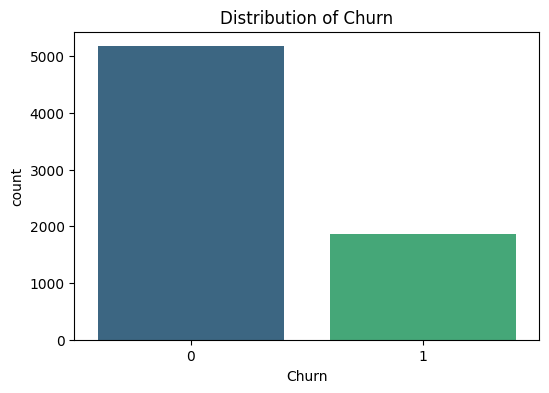

In [ ]:
#I wanted to see the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=Cdata, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'customerID' is not relevant for prediction
X_train_numeric = X_train.select_dtypes(exclude=['object'])
X_test_numeric = X_test.select_dtypes(exclude=['object'])

model = RandomForestClassifier()
model.fit(X_train_numeric, y_train)

feature_importances = model.feature_importances_

# Create pairs of feature names and importances
feature_importance_pairs = zip(X_train_numeric.columns, feature_importances)

# Sort pairs by importance in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Extract the top 10 sorted feature names
top_10_features = [feature[0] for feature in sorted_feature_importance[:10]]

# Print or use top_10_features as needed
print("Top 10 Relevant Features in Descending Order of Importance:")
print(top_10_features, '\n')


Top 10 Relevant Features in Descending Order of Importance:
['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'PaymentMethod_Electronic check', 'gender', 'PaperlessBilling', 'Partner'] 



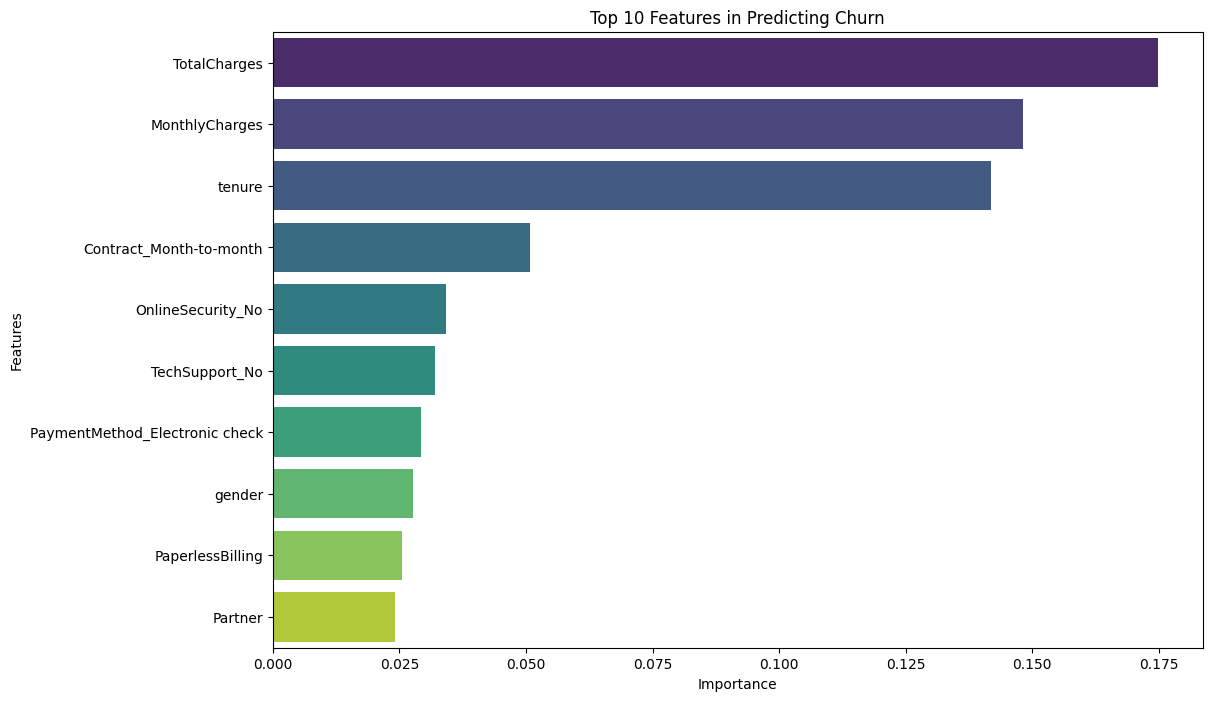

In [ ]:

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train_numeric.columns, 'Importance': model.feature_importances_})

# Filter for the top 10 features
top_10_features_df = feature_importance_df[feature_importance_df['Feature'].isin(top_10_features)]

# Sort the DataFrame by importance in descending order
top_10_features_df = top_10_features_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Features in Predicting Churn')
plt.show()


Therefore, these are the top 10 features

# **Feature** **Subset**

# **Training**

In [ ]:
#Saving scaler to use in deployment
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Training an MLP using features from (1) with cross validation and GridSearchCV

In [ ]:
# Define the MLP model using the MLPClassifier
mlp_model = MLPClassifier(max_iter=100)

In [ ]:

mlp_model.fit(X_train_numeric, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [ ]:
# Define the pipeline for preprocessing and model training
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=100))
])

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(64, 32), (32, 16)],
    'mlp__alpha': [0.0001, 0.001],  # Regularization parameter
}


In [ ]:
# Perform cross-validated grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(mlp_pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train_numeric, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64, 32); total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__alpha=0.0001, mlp__hidden_layer_sizes=(32, 16); total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(64, 32); total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .mlp__alpha=0.001, mlp__hidden_layer_sizes=(32, 16); total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(max_iter=100))]),
             param_grid={'mlp__alpha': [0.0001, 0.001],
                         'mlp__hidden_layer_sizes': [(64, 32), (32, 16)]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best parameters from grid search and evaluate the model on the test set
best_params = grid_search.best_params_
best_mlp_model = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

# Evaluate on the test set
y_pred_proba = best_mlp_model.predict_proba(X_test_numeric)[:, 1]
y_pred = best_mlp_model.predict(X_test_numeric)
test_accuracy = accuracy_score(y_test, y_pred)


In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

In [ ]:
# Print results
print("Test Accuracy:", test_accuracy)
print("AUC Score:", auc_score)
print("Best Parameters:", best_params)

Test Accuracy: 0.7998580553584103
AUC Score: 0.8358672249422919
Best Parameters: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (32, 16)}


In [ ]:
# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[934 102]
 [180 193]]


In [ ]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



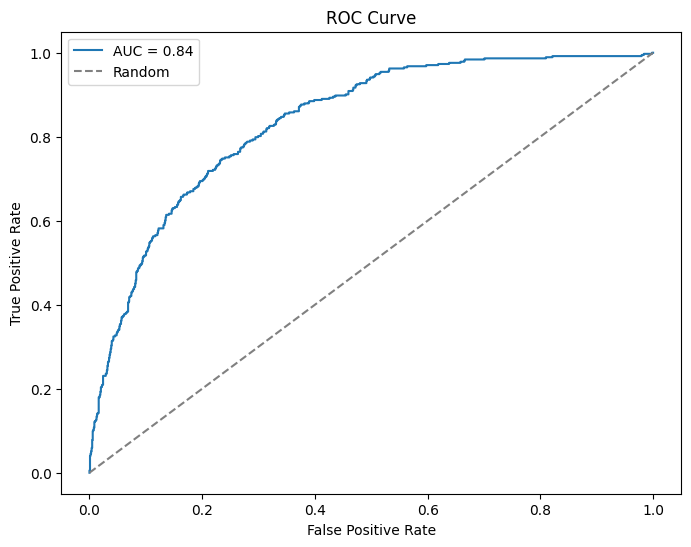

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import pickle

# Save the best model to a file using pickle
model_filename = 'best_mlp_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_mlp_model, file)
